# Python API: начало работы с API

### Зачем использовать API вместо статического набора данных CSV
1. Данные быстро меняются
2. Вам нужен небольшой фрагмент гораздо большего набора данных
3. Требуется повторное вычисление


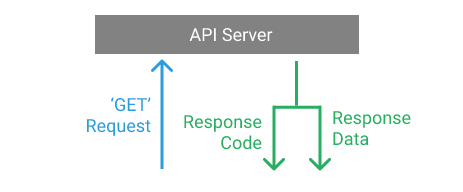

In [1]:
#загрузка библиотеки для выполнения запросов
import requests

### Делаем наш первый запрос к API: запрос GET
<i>Извлечение данных</i>

In [6]:
r = requests.get('https://api.github.com/events')
print(r)

<Response [200]>


Когда мы делаем запрос, ответ API приходит с кодом ответа, который сообщает нам, был ли наш запрос успешным. Коды ответа важны, потому что они немедленно сообщают нам, если что-то пошло не так.

<pre>200: Все прошло нормально, и результат был возвращен (если есть).
301: Сервер перенаправляет вас на другую конечную точку. Это может произойти, когда компания меняет доменные имена или имя конечной точки.
400: Сервер считает, что вы сделали неверный запрос. Это может произойти, помимо прочего, когда вы не отправляете нужные данные.
401: Сервер считает, что вы не аутентифицированы. Многие API требуют учетных данных для входа, поэтому это происходит, когда вы не отправляете правильные учетные данные для доступа к API.
403: Ресурс, к которому вы пытаетесь получить доступ, запрещен: у вас нет необходимых разрешений для его просмотра.
404: Ресурс, к которому вы пытались получить доступ, не найден на сервере.
503: Сервер не готов обработать запрос.</pre>

Рассмотрим: http://open-notify.org/

Первая конечная точка, которую мы будем использовать https://api.open-notify.org/astros.json, возвращает данные о космонавтах, находящихся в настоящее время в космосе.

In [41]:
response = requests.get("http://api.open-notify.org/astros.json")
print(response.status_code)

200


In [42]:
print(response.json())
a=response.json()
print("количество людей в космосе ", a['number'])

{'number': 7, 'message': 'success', 'people': [{'name': 'Mark Vande Hei', 'craft': 'ISS'}, {'name': 'Oleg Novitskiy', 'craft': 'ISS'}, {'name': 'Pyotr Dubrov', 'craft': 'ISS'}, {'name': 'Thomas Pesquet', 'craft': 'ISS'}, {'name': 'Megan McArthur', 'craft': 'ISS'}, {'name': 'Shane Kimbrough', 'craft': 'ISS'}, {'name': 'Akihiko Hoshide', 'craft': 'ISS'}]}
количество людей в космосе  7


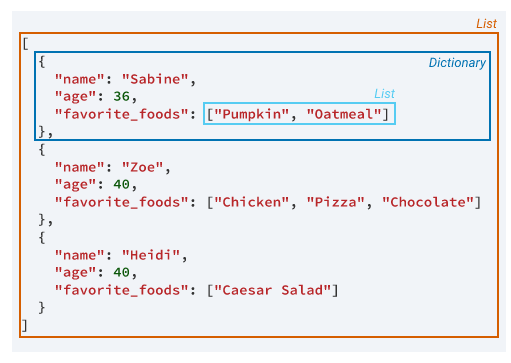

1. json.dumps() - Принимает объект Python и преобразует (выгружает) его в строку.
2. json.loads() - Принимает строку JSON и преобразует (загружает) ее в объект Python.

In [43]:
import json
def jprint(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)

jprint(response.json())

{
    "message": "success",
    "number": 7,
    "people": [
        {
            "craft": "ISS",
            "name": "Mark Vande Hei"
        },
        {
            "craft": "ISS",
            "name": "Oleg Novitskiy"
        },
        {
            "craft": "ISS",
            "name": "Pyotr Dubrov"
        },
        {
            "craft": "ISS",
            "name": "Thomas Pesquet"
        },
        {
            "craft": "ISS",
            "name": "Megan McArthur"
        },
        {
            "craft": "ISS",
            "name": "Shane Kimbrough"
        },
        {
            "craft": "ISS",
            "name": "Akihiko Hoshide"
        }
    ]
}


In [45]:
response = requests.get("https://randomuser.me/api/")
response.text

'{"results":[{"gender":"female","name":{"title":"Mrs","first":"Nalan","last":"Keçeci"},"location":{"street":{"number":6857,"name":"Istiklal Cd"},"city":"Bayburt","state":"Kütahya","country":"Turkey","postcode":76578,"coordinates":{"latitude":"77.5681","longitude":"134.2693"},"timezone":{"offset":"+4:00","description":"Abu Dhabi, Muscat, Baku, Tbilisi"}},"email":"nalan.kececi@example.com","login":{"uuid":"b879a7d8-bfbe-47c6-895f-916ec1165965","username":"whitemeercat177","password":"elwood","salt":"8S5CWAXL","md5":"752ff67384ebd1efdf67d66ea3f88337","sha1":"fce6ec77a17b4abf778a55fcc28e4eb0e21bedbb","sha256":"cb947c48ab0a867bbf940e5c962dc89a9ea12dc2ee467838950b1ad4a2c45cbb"},"dob":{"date":"1967-12-11T17:38:33.060Z","age":54},"registered":{"date":"2017-12-14T17:31:51.471Z","age":4},"phone":"(003)-363-3331","cell":"(012)-946-0692","id":{"name":"","value":null},"picture":{"large":"https://randomuser.me/api/portraits/women/78.jpg","medium":"https://randomuser.me/api/portraits/med/women/78.jpg

<pre>ример, вот базовые URL-адреса для нескольких известных проигрывателей API:

https://api.twitter.com
https://api.github.com
https://api.stripe.com
</pre>

In [13]:
response = requests.get("https://api.thedogapi.com/")
response.text

'{"message":"The Dog API"}'

https://docs.thedogapi.com/api-reference/breeds/breeds-list

<AxesSubplot:title={'center':'count of dogs'}, ylabel='id'>

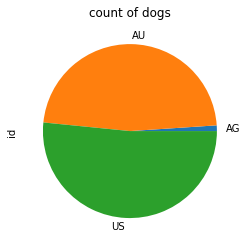

In [64]:
response = requests.get("https://api.thedogapi.com/v1/breeds").json()
#response.text
import pandas as pd
dogs=pd.DataFrame(response)
#dogs.columns
res=dogs.groupby('country_code').sum()
res['id'].plot(kind='pie', title='count of dogs')

<pre>HTTP-метод	Описание	Метод запросов
POST	Создайте новый ресурс.	requests.post()
GET	Прочтите существующий ресурс.	requests.get()
PUT	Обновите существующий ресурс.	requests.put()
DELETE	Удалить существующий ресурс.	requests.delete()
</pre>

In [40]:
requests.post("https://api.thedogapi.com/v1/breeds/1")
requests.get("https://api.thedogapi.com/v1/breeds/1")
requests.put("https://api.thedogapi.com/v1/breeds/1")
requests.delete("https://api.thedogapi.com/v1/breeds/1")

<Response [405]>

### Использование API с параметрами запроса

https://api.open-notify.org/iss-pass.jsonконечная - эта конечная точка сообщает нам в следующий раз, что международная космическая станция пройдет над заданным местом на Земле.

In [65]:
requests.get("https://randomuser.me/api/?gender=female&nat=de").json()

{'results': [{'gender': 'female',
   'name': {'title': 'Ms', 'first': 'Jeanette', 'last': 'Hein'},
   'location': {'street': {'number': 3349, 'name': 'Schillerstraße'},
    'city': 'Möckmühl',
    'state': 'Sachsen',
    'country': 'Germany',
    'postcode': 86734,
    'coordinates': {'latitude': '-54.6683', 'longitude': '-0.4961'},
    'timezone': {'offset': '+6:00', 'description': 'Almaty, Dhaka, Colombo'}},
   'email': 'jeanette.hein@example.com',
   'login': {'uuid': '5fc5d9cd-dd91-44bf-b084-4733de847109',
    'username': 'orangeelephant335',
    'password': '135790',
    'salt': 'YYMfrS8p',
    'md5': '5a324ab4e157a6a6aa5717bbbdc306ac',
    'sha1': 'f99a6770e2f229284dbde0f4ba297403274dae1f',
    'sha256': '5f38294b737324e429852000a3e2a59fcd88f515a9017d2727e4fb501a7ff78d'},
   'dob': {'date': '1970-10-28T17:56:14.183Z', 'age': 51},
   'registered': {'date': '2005-10-08T15:25:10.220Z', 'age': 16},
   'phone': '0895-2410526',
   'cell': '0176-6560742',
   'id': {'name': '', 'value': 

In [22]:
parameters = {
    "lat": 40.71,
    "lon": -74
}

In [23]:
response = requests.get("http://api.open-notify.org/iss-now.json", params=parameters)
jprint(response.json())

{
    "iss_position": {
        "latitude": "-51.2387",
        "longitude": "19.6304"
    },
    "message": "success",
    "timestamp": 1621413348
}


In [44]:
query_params = {"gender": "female", "nat": "de"}
requests.get("https://randomuser.me/api/", params=query_params).json()


{'results': [{'gender': 'female',
   'name': {'title': 'Miss', 'first': 'Juliana', 'last': 'Buß'},
   'location': {'street': {'number': 2930, 'name': 'Lerchenweg'},
    'city': 'Schrobenhausen',
    'state': 'Sachsen-Anhalt',
    'country': 'Germany',
    'postcode': 27529,
    'coordinates': {'latitude': '4.4561', 'longitude': '7.0794'},
    'timezone': {'offset': '+6:00', 'description': 'Almaty, Dhaka, Colombo'}},
   'email': 'juliana.buss@example.com',
   'login': {'uuid': '10c49cd3-e86b-4695-8900-db56189cd8d7',
    'username': 'beautifulbird856',
    'password': 'mailman',
    'salt': '6IySyJwW',
    'md5': '605a5e6283f70419e6c7d1275d286cc2',
    'sha1': '375d036b85d80635ca4fdc3c80905a223b1bd9ec',
    'sha256': '01c3b6b9f7b708e2e476bc1c006bba4010340881c573221874c993a1b73955c0'},
   'dob': {'date': '1982-10-02T21:16:40.912Z', 'age': 39},
   'registered': {'date': '2007-10-18T11:35:36.659Z', 'age': 14},
   'phone': '0156-7858498',
   'cell': '0172-6716223',
   'id': {'name': '', 'val

In [45]:
query_params = {"q": "labradoodle"}
endpoint = "https://api.thedogapi.com/v1/breeds/search"
requests.get(endpoint, params=query_params).json()

[{'weight': {'imperial': '45 - 100', 'metric': '20 - 45'},
  'height': {'imperial': '14 - 24', 'metric': '36 - 61'},
  'id': 148,
  'name': 'Labradoodle',
  'breed_group': 'Mixed',
  'life_span': '10 - 15 years'}]

## Аутентификация

In [71]:
endpoint = "https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos"
# Replace DEMO_KEY below with your own key if you generated one. https://api.nasa.gov/
api_key = "e2UrzH3AfQTAFSzOFmTtZjpNb98NTbVfedOAmRlg"
query_params = {"api_key": api_key, "earth_date": "2020-07-01"}
response = requests.get(endpoint, params=query_params)
response

<Response [200]>

In [72]:
response.json()

{'photos': [{'id': 754118,
   'sol': 2809,
   'camera': {'id': 20,
    'name': 'FHAZ',
    'rover_id': 5,
    'full_name': 'Front Hazard Avoidance Camera'},
   'img_src': 'https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/02809/opgs/edr/fcam/FLB_646868981EDR_F0810628FHAZ00337M_.JPG',
   'earth_date': '2020-07-01',
   'rover': {'id': 5,
    'name': 'Curiosity',
    'landing_date': '2012-08-06',
    'launch_date': '2011-11-26',
    'status': 'active'}},
  {'id': 754119,
   'sol': 2809,
   'camera': {'id': 20,
    'name': 'FHAZ',
    'rover_id': 5,
    'full_name': 'Front Hazard Avoidance Camera'},
   'img_src': 'https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/02809/opgs/edr/fcam/FRB_646868981EDR_F0810628FHAZ00337M_.JPG',
   'earth_date': '2020-07-01',
   'rover': {'id': 5,
    'name': 'Curiosity',
    'landing_date': '2012-08-06',
    'launch_date': '2011-11-26',
    'status': 'active'}},
  {'id': 754120,
   'sol': 2809,
   'camera': {'id': 20,
   

In [56]:
photos = response.json()["photos"]
print(f"Found {len(photos)} photos")

Found 12 photos


In [59]:
photos[4]["img_src"]

'https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/02809/opgs/edr/rcam/RRB_646869036EDR_F0810628RHAZ00337M_.JPG'

In [36]:
query_params = {"api_key": 'a5a59349-c88c-4849-b464-09e11703b4aa'}
response = requests.get("https://api.thedogapi.com/v1/images/search",params=query_params)
response.text


'[{"breeds":[{"weight":{"imperial":"17 - 23","metric":"8 - 10"},"height":{"imperial":"13.5 - 16.5","metric":"34 - 42"},"id":222,"name":"Shiba Inu","bred_for":"Hunting in the mountains of Japan, Alert Watchdog","breed_group":"Non-Sporting","life_span":"12 - 16 years","temperament":"Charming, Fearless, Keen, Alert, Confident, Faithful","reference_image_id":"Zn3IjPX3f"}],"id":"hKXTfH70r","url":"https://cdn2.thedogapi.com/images/hKXTfH70r.jpg","width":1000,"height":1000}]'

In [35]:
r = requests.post('https://httpbin.org/post', data = {'key':'value'})

In [38]:
query_params = {"api_key": 'a5a59349-c88c-4849-b464-09e11703b4aa'}
requests.post("https://api.thedogapi.com/v1/breeds/1",params=query_params)
#requests.get("https://api.thedogapi.com/v1/breeds/1")
#requests.put("https://api.thedogapi.com/v1/breeds/1")
#requests.delete("https://api.thedogapi.com/v1/breeds/1")

<Response [405]>

In [12]:
payload = {'key1': 'value1', 'key2': 'value2'}
r = requests.get('https://httpbin.org/get', params=payload)
r

<Response [200]>

### Pandas datareader
-это дополнительный пакет, который позволяет создавать данные изразличных интернет-источников данных, в том числе:
<ul><li>Yahoo!финансов</li>
    <li>Google Finance</li>
    <li>St.Louis FED (FRED)</li>
    <li>Библиотека данных Кеннета Франца</li>
    <li>Всемирный банк</li>
    <li>Гугл Аналитика</li></ul>


In [15]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [5]:
from pandas_datareader import data

In [22]:
aa=data.DataReader("AAPL", 
                       start='2018-1-1', 
                       end='2020-05-01', 
                       data_source='yahoo')['Adj Close']

<AxesSubplot:xlabel='Date'>

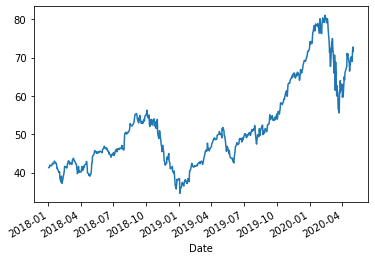

In [12]:
aa.plot()

In [28]:
pip install wbdata

Note: you may need to restart the kernel to use updated packages.


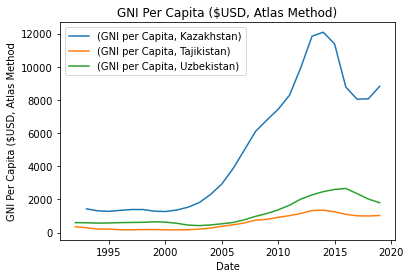

In [36]:
import wbdata
import pandas
import matplotlib.pyplot as plt
 
#set up the countries I want
countries = ["TJ","KZ","UZ"]
 
#set up the indicator I want (just build up the dict if you want more than one)
indicators = {'NY.GNP.PCAP.CD':'GNI per Capita'}
 
#grab indicators above for countires above and load into data frame
df = wbdata.get_dataframe(indicators, country=countries, convert_date=False)

#df is "pivoted", pandas' unstack fucntion helps reshape it into something plottable
dfu = df.unstack(level=0)

# a simple matplotlib plot with legend, labels and a title
dfu.plot(); 
plt.legend(loc='best'); 
plt.title("GNI Per Capita ($USD, Atlas Method)"); 
plt.xlabel('Date'); plt.ylabel('GNI Per Capita ($USD, Atlas Method');


In [38]:
pip install wbgapi

Note: you may need to restart the kernel to use updated packages.


In [61]:
import wbgapi as wb

In [62]:
wb.source.info()

id,name,lastupdated
1,Doing Business,2019-10-23
2,World Development Indicators,2021-04-26
3,Worldwide Governance Indicators,2020-09-28
5,Subnational Malnutrition Database,2016-03-21
6,International Debt Statistics,2021-01-21
11,Africa Development Indicators,2013-02-22
12,Education Statistics,2020-12-20
13,Enterprise Surveys,2021-04-02
14,Gender Statistics,2021-04-27
15,Global Economic Monitor,2020-07-27


In [63]:
wb.region.info()

code,name
AFR,Africa
ARB,Arab World
CAA,Sub-Saharan Africa (IFC classification)
CEA,East Asia and the Pacific (IFC classification)
CEB,Central Europe and the Baltics
CEU,Europe and Central Asia (IFC classification)
CLA,Latin America and the Caribbean (IFC classification)
CME,Middle East and North Africa (IFC classification)
CSA,South Asia (IFC classification)
CSS,Caribbean small states


In [45]:
wb.series.info()

id,value
AG.AGR.TRAC.NO,"Agricultural machinery, tractors"
AG.CON.FERT.PT.ZS,Fertilizer consumption (% of fertilizer production)
AG.CON.FERT.ZS,Fertilizer consumption (kilograms per hectare of arable land)
AG.LND.AGRI.K2,Agricultural land (sq. km)
AG.LND.AGRI.ZS,Agricultural land (% of land area)
AG.LND.ARBL.HA,Arable land (hectares)
AG.LND.ARBL.HA.PC,Arable land (hectares per person)
AG.LND.ARBL.ZS,Arable land (% of land area)
AG.LND.CREL.HA,Land under cereal production (hectares)
AG.LND.CROP.ZS,Permanent cropland (% of land area)


In [46]:
pip install python-facebook-api

Note: you may need to restart the kernel to use updated packages.


In [64]:
wb.search('Tajikistan')

ID,Name,Field,Value
TJK,Tajikistan,LongName,Republic of Tajikistan
TJK,Tajikistan,ShortName,Tajikistan
TJK,Tajikistan,TableName,Tajikistan


In [95]:
res=wb.data.DataFrame('SP.POP.TOTL', time=range(2010, 2020, 2), labels=True)

<AxesSubplot:>

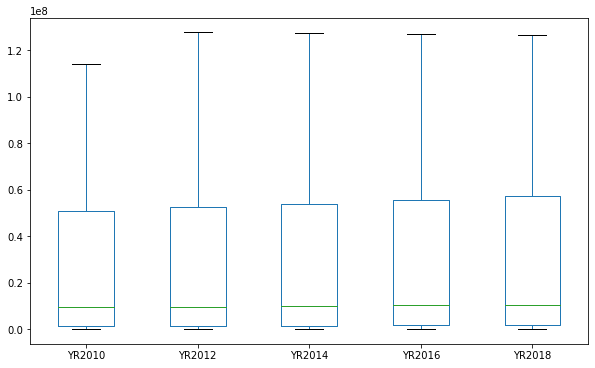

In [90]:
res.plot(kind='box',figsize=(10, 6), showfliers=False)

In [98]:
res['YR2018'].mean()

308037077.1908397

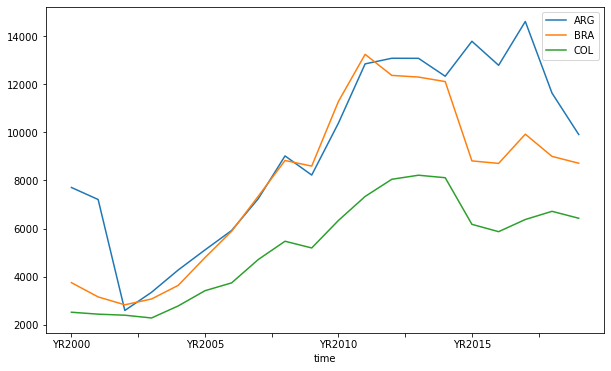

In [62]:
wb.data.DataFrame('NY.GDP.PCAP.CD', ['BRA', 'ARG', 'COL'],
                  range(2000, 2020), index='time').plot(figsize=(10, 6))
plt.show()

In [99]:
P=wb.data.DataFrame('SP.POP.TOTL', time=range(2010, 2020, 2), labels=True)
Ec=wb.data.DataFrame('BX.KLT.DINV.WD.GD.ZS', time=range(2010, 2020, 2), labels=True)

In [105]:
pd.merge(P,Ec, on=['Country',''])

,Country,YR2010_x,YR2012_x,YR2014_x,YR2016_x,YR2018_x,YR2010_y,YR2012_y,YR2014_y,YR2016_y,YR2018_y
0,Zimbabwe,1.269772e+07,1.311513e+07,1.358668e+07,1.403039e+07,1.443902e+07,1.018022,2.044131,2.425173,1.669274,3.062893
1,Zambia,1.360598e+07,1.446512e+07,1.539975e+07,1.636351e+07,1.735182e+07,8.533196,6.789381,5.553442,3.163072,1.552281
2,"Yemen, Rep.",2.315486e+07,2.447318e+07,2.582348e+07,2.716821e+07,2.849869e+07,0.610358,-0.040222,-0.539513,-1.813423,-1.201120
3,West Bank and Gaza,3.786161e+06,3.979998e+06,4.173398e+06,4.367088e+06,4.569087e+06,1.858607,0.515918,1.141638,1.924478,1.294463
4,Virgin Islands (U.S.),1.083570e+05,1.081880e+05,1.078820e+05,1.075160e+05,1.070010e+05,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
259,East Asia & Pacific,2.206885e+09,2.236819e+09,2.267489e+09,2.298507e+09,2.328198e+09,2.923171,2.443465,2.866894,2.357809,2.322509
260,Early-demographic dividend,2.907917e+09,2.994363e+09,3.079707e+09,3.164391e+09,3.248252e+09,2.174632,1.840229,1.773522,1.964692,2.024287
261,Central Europe and the Baltics,1.044214e+08,1.039353e+08,1.034962e+08,1.029943e+08,1.025370e+08,1.594939,2.902613,3.611997,8.755489,-1.325143
262,Caribbean small states,6.973196e+06,7.072661e+06,7.173442e+06,7.269385e+06,7.358958e+06,4.010042,0.933152,4.131145,4.148990,3.717145


In [107]:
cols = ['Country']
df = pd.concat([P.set_index(cols)['YR2018'], 
                Ec.set_index(cols)['YR2018']],axis=1, keys=('YR2018','a'))
df['YR2018'] = df[['YR2018','a']].values.tolist()
df = df.drop('a', axis=1).reset_index()
print (df)

                            Country                            YR2018
0                          Zimbabwe     [14439018.0, 3.0628934707009]
1                            Zambia    [17351822.0, 1.55228148998717]
2                       Yemen, Rep.   [28498687.0, -1.20112018256352]
3                West Bank and Gaza     [4569087.0, 1.29446294401352]
4             Virgin Islands (U.S.)                   [107001.0, nan]
..                              ...                               ...
259             East Asia & Pacific  [2328197666.0, 2.32250918714124]
260      Early-demographic dividend  [3248252342.0, 2.02428667171712]
261  Central Europe and the Baltics  [102537026.0, -1.32514348024773]
262          Caribbean small states     [7358958.0, 3.71714529166854]
263                      Arab World   [419790591.0, 1.25198411573118]

[264 rows x 2 columns]


In [121]:
df[df['Country']. str.contains ('Taj')]

,Country,YR2018
26,Tajikistan,"[9100837.0, 2.93584693011557]"
